# Problem 2 Gaussian Mixture

In [1]:
import pymc3 as pm 
import arviz as az
import numpy as np
import matplotlib.pyplot as plt 
import math 
%matplotlib inline

In [ ]:
# maxwell - exponential
X = 98

with pm.Model() as model:
    theta = pm.NormalMixture('theta', w = np.array([2./3, 1./3]), mu = np.array([110, 100]), tau = np.array([1./60, 1./200]))
    x = pm.Normal('data', mu = theta, tau = 1./80, observed = X)
    trace = pm.sample(2000, tune = 1000)
    posterior_checks = pm.sample_posterior_predictive()
az.summary(trace)

In [14]:
N = 1064
X = 787

with pm.Model() as model:
    prop = pm.Beta('prior', alpha = 12, beta = 4)
    x = pm.Binomial('likelihood', n = N, p = prop, observed = X)
    trace = pm.sample(2000, tune = 1000)
    prior_checks = pm.sample_posterior_predictive(trace, var_names=['prior'])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [prior]
100%|██████████| 8000/8000 [00:00<00:00, 34567.61it/s]


0.776375


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
prior,0.74,0.013,0.715,0.766,0.0,0.0,3625.0,3625.0,3607.0,5295.0,1.0


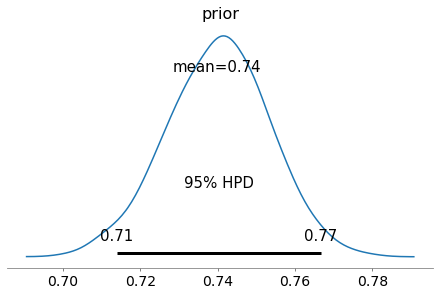

In [15]:
print(sum(prior_checks['prior'] < 0.75)/len(prior_checks['prior']))
az.plot_posterior(trace, var_names=['prior'], credible_interval=0.95)
az.summary(trace)